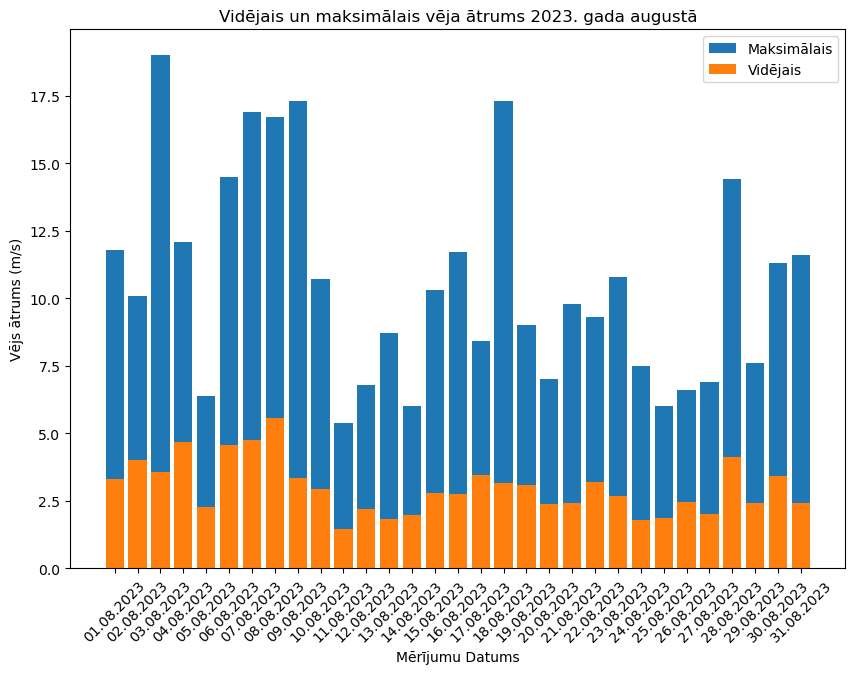

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file1 = pd.read_excel('vejaAtrumsFaktiskais.xlsx')
file2 = pd.read_excel('vejaAtrumsBrazmas.xlsx')

dates = file1['Datums']
y1 = file1[file1.columns[1:]].mean(axis=1)
y2 = file2[file2.columns[1:]].max(axis=1)

plt.figure(figsize = (10, 7))
plt.bar(dates, y2, label = 'Maksimālais', width=0.8)
plt.bar(dates, y1, label = 'Vidējais', width=0.8)
plt.xlabel("Mērījumu Datums")
plt.ylabel("Vējs ātrums (m/s)")
plt.title("Vidējais un maksimālais vēja ātrums 2023. gada augustā")
plt.legend()
plt.xticks(np.arange(len(dates)), dates, rotation=45)
plt.show()

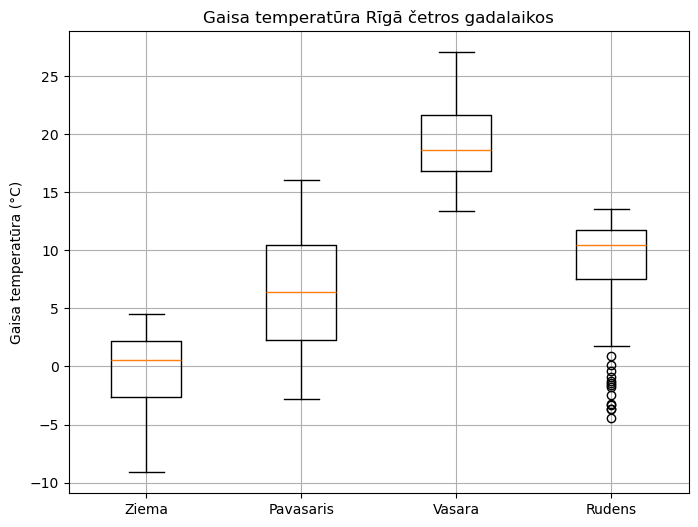

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('gaisaTemperatura2022.xlsx')

date_column = 'Datums'
data[date_column] = pd.to_datetime(data[date_column], format='%d.%m.%Y')
data.set_index(date_column, inplace=True)

daily_avg_temps = data.mean(axis=1).to_frame()
daily_avg_temps.index = pd.to_datetime(daily_avg_temps.index)
daily_avg_temps['Month'] = daily_avg_temps.index.month

def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

daily_avg_temps['Season'] = daily_avg_temps['Month'].apply(get_season)

seasonal_avg_temps = daily_avg_temps.groupby('Season').mean()

plt.figure(figsize=(8, 6))
plt.boxplot([daily_avg_temps[daily_avg_temps['Season'] == 'Winter'][0],
             daily_avg_temps[daily_avg_temps['Season'] == 'Spring'][0],
             daily_avg_temps[daily_avg_temps['Season'] == 'Summer'][0],
             daily_avg_temps[daily_avg_temps['Season'] == 'Autumn'][0]],
            labels=['Ziema', 'Pavasaris', 'Vasara', 'Rudens'])

plt.title('Gaisa temperatūra Rīgā četros gadalaikos')
plt.ylabel('Gaisa temperatūra (°C)')
plt.grid(True)
plt.show()
